In [96]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [97]:
df = pd.read_csv('pns-reduzido-2019-notnull-full.csv')

In [98]:
indices = np.arange(len(df))
np.random.shuffle(indices)
df = df.iloc[indices]
X = df.drop(columns=['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '])
Y = df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
forest_pred = clf.predict(x_test)
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))


[[1067   50]
 [ 257  823]]
              precision    recall  f1-score   support

         1.0       0.81      0.96      0.87      1117
         2.0       0.94      0.76      0.84      1080

    accuracy                           0.86      2197
   macro avg       0.87      0.86      0.86      2197
weighted avg       0.87      0.86      0.86      2197



## XG BOOST

In [100]:
# Instalação de pacotes
# !pip install tensorflow
# !pip install xgboost

import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


In [101]:
# GridSearch como classificador
model = XGBClassifier(
 learning_rate =1,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
n_estimators = [100, 1000]
max_depth = [1, 100]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)


In [102]:
# Adaptação do dataset para ter valores 0 = red e 1 = white
df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '].replace(('red', 'white'), (1, 0), inplace=True)

seed = 42
array = df.values
test_size = 0.3


Best: 0.893351 using {'max_depth': 1, 'n_estimators': 1000}
0.890888 (0.004583) with: {'max_depth': 1, 'n_estimators': 100}
0.893351 (0.003955) with: {'max_depth': 1, 'n_estimators': 1000}
0.874827 (0.000409) with: {'max_depth': 100, 'n_estimators': 100}
0.874239 (0.001824) with: {'max_depth': 100, 'n_estimators': 1000}


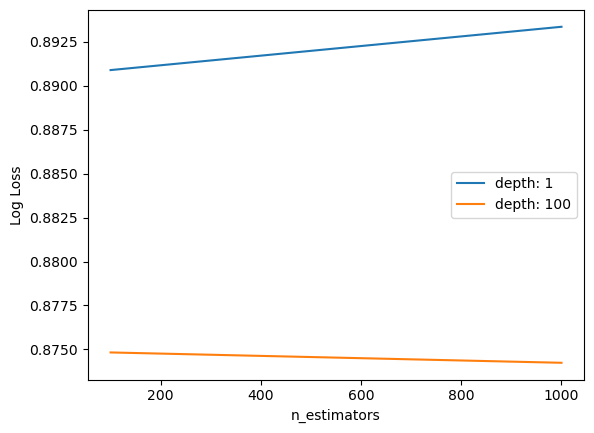

In [103]:
# Exibição dos resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Plota os resultados
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()


## Estudando rede neural e fazendo testes com a biblioteca keras

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sexo'] = label_encoder.fit_transform(df['Sexo'])
df['Cor ou raça'] = label_encoder.fit_transform(df['Cor ou raça'])

# Crie o modelo da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])  # Camada de saída com 1 neurônio (para classificação binária)

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
161/161 [==============================] - 6s 17ms/step - loss: -804.3226 - accuracy: 0.4654 - val_loss: -2954.9561 - val_accuracy: 0.4948
Epoch 2/100
161/161 [==============================] - 1s 7ms/step - loss: -15129.9404 - accuracy: 0.4964 - val_loss: -38103.1758 - val_accuracy: 0.4948
Epoch 3/100
161/161 [==============================] - 1s 6ms/step - loss: -90140.6406 - accuracy: 0.4964 - val_loss: -162482.2969 - val_accuracy: 0.4948
Epoch 4/100
161/161 [==============================] - 1s 8ms/step - loss: -274186.5938 - accuracy: 0.4964 - val_loss: -413594.5625 - val_accuracy: 0.4948
Epoch 5/100
161/161 [==============================] - 2s 15ms/step - loss: -601833.4375 - accuracy: 0.4964 - val_loss: -825359.0625 - val_accuracy: 0.4948
Epoch 6/100
161/161 [==============================] - 2s 12ms/step - loss: -1102113.0000 - accuracy: 0.4964 - val_loss: -1424376.8750 - val_accuracy: 0.4948
Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss